# Regression

Reference link : https://teddylee777.github.io/scikit-learn/scikit-learn-linear-with-regularizations

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법  

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용됨.  
선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식.  

규제(Regularization) : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서, 회귀 계수에 패널티 값을 적용하는 것.  
- 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델.  
                L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.  
- 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 방식.   
                L1 규제는 예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.  
                피처 선택 기능으로 불리기도 함.  
- 엘라스틱넷(ElasticNet) : L2,L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 사용됨.  
                L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.  
- 로지스틱 회귀(Logistic Regression) : 사실은 분류에 사용되는 선형 모델.  매우 강력한 분류 알고리즘.  
                일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.


## Import package

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

In [3]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

Gradient Descent :  
'점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서, 오류 값이 최소가 되는 W 파라미터를 구하는 방식.  
어떻게 보면 무식해 보이는 방법이지만, W 파라미터의 개수에 따라 매우 복잡해지는 고차원 방정시을 푸는 것보다 훨씬 더 직관적이고 빠르게
비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있음.  

In [4]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [5]:
# W1과 W0를 업데이트 할 w1_update, w0_update를 반환.  
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [6]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for iter in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

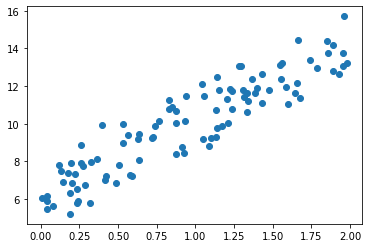

In [7]:
np.random.seed(0)
# y=4X+6을 근사 (w1=4, w0=6).
X = 2*np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [8]:
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print(f'w1:{w1[0,0]:.3f}, w0:{w0[0,0]:1.3f}')
y_pred = w1[0,0] * X + w0
print(f'Gradient Descent Total Cost : {get_cost(y,y_pred):.4f}')

w1:4.022, w0:6.162
Gradient Descent Total Cost : 0.9935


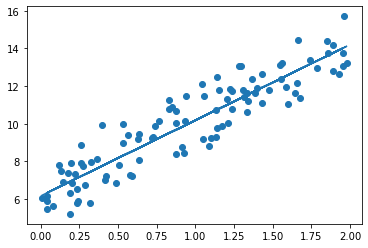

In [9]:
plt.scatter(X,y)
plt.plot(X, y_pred)

실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용함.  
전체 X, y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계사하는 부분만 차이가 있음.

-----

## Load Data

사이킷런에 내장된 보스턴 주택 가격 데이터

- CRIM : 지역별 범죄 발생률  
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수  
    - (강의 경계에 위치한 경우는 1, 아니면 0  
- NOX : 일산화질소 농도  
- RM : 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 거리  
- RAD : 고속도로 접근 용이도 지수  
- TAX : 10,000 달러 당 재산세율  
- PTRAIO : town별 학생/교사 비율  
- B : town별 흑인의 비율  
- LSTAT : 하위계층 비율(%)  
- MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [10]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [11]:
boston = load_boston()

In [12]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [13]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df_boston['PRICE'] = boston.target

In [15]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# df_boston.columns = ["INDEX", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
df_boston.to_csv('boston_house_price.csv', header=True, index=False)

In [17]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> non-null, all data is float types

-----

## EDA

#### seaborn - regplot() : X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

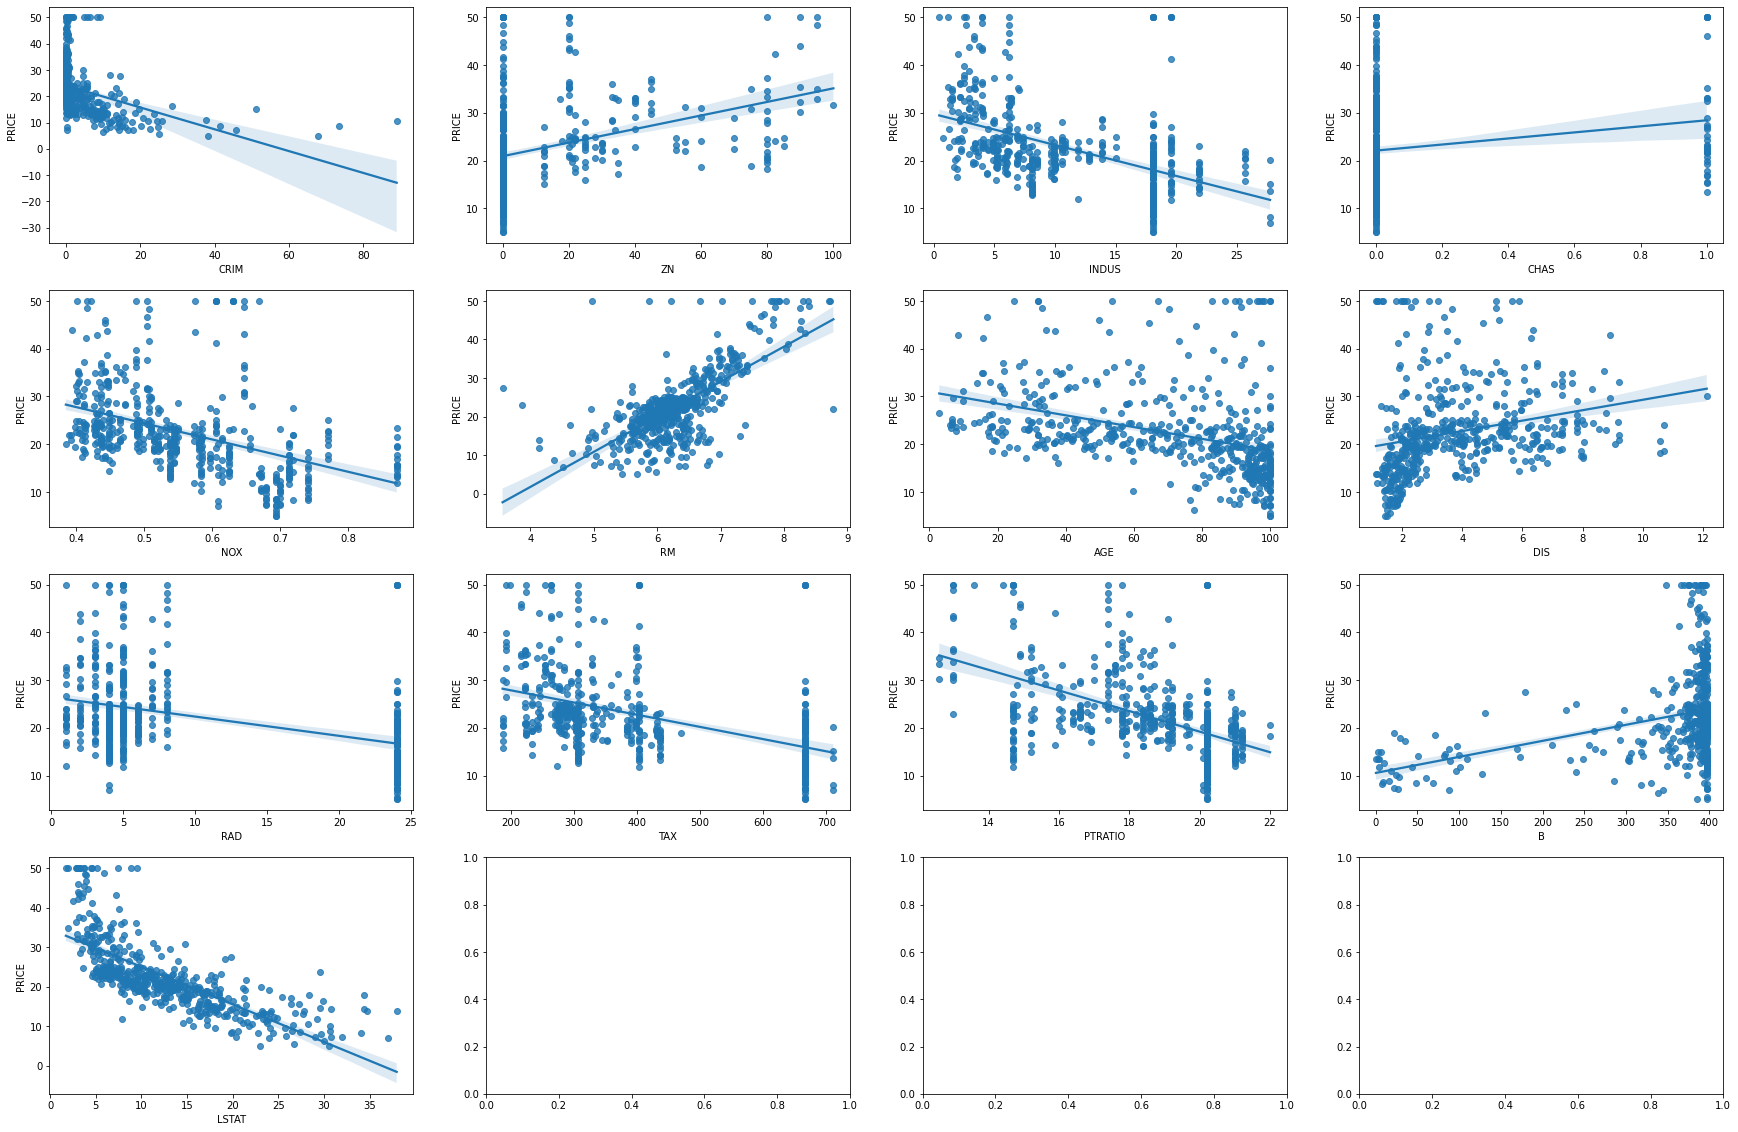

In [18]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=df_boston,ax=axs[row][col])


=> RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남  
    - RM : Positive Linearity  
    - LSTAT : Negative Linearity  

-----

## PreProcessing

### Feature Scaling

### Train, Test set split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

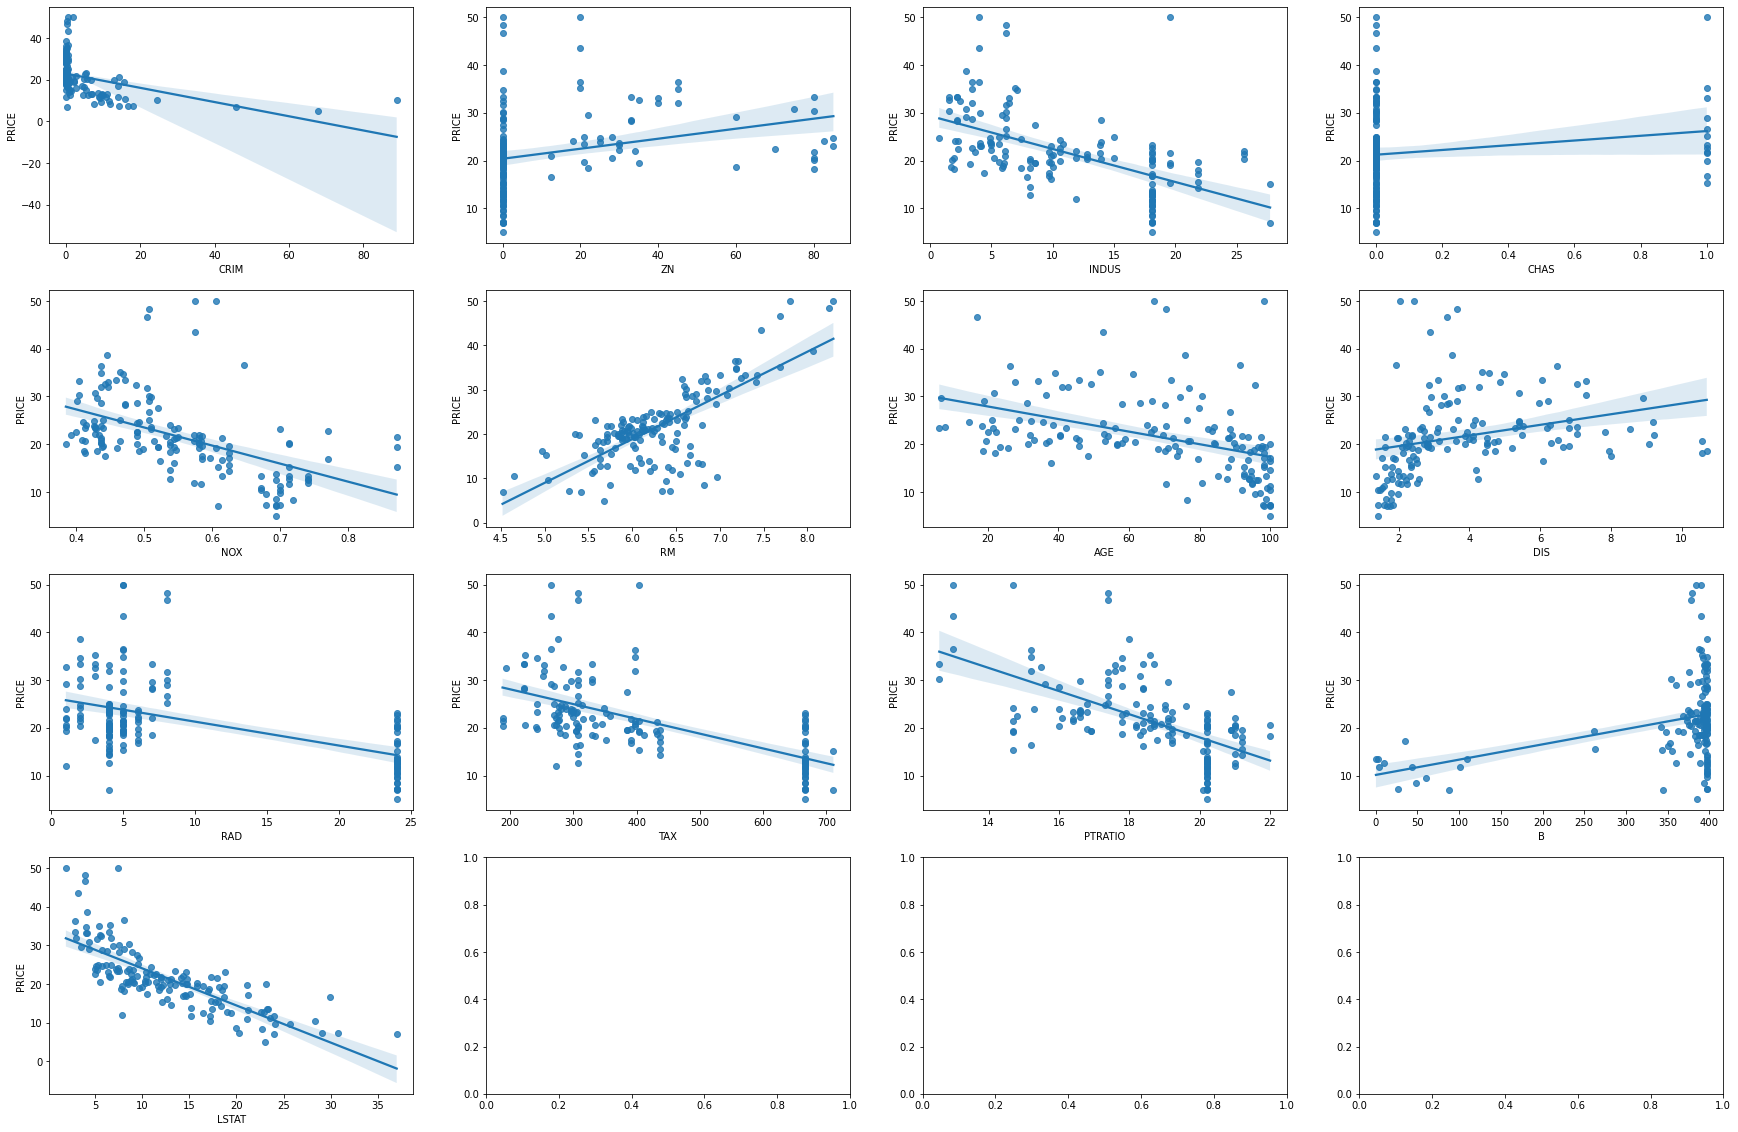

In [21]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y=y_test,data=x_test,ax=axs[row][col])

-----

## Prediction by Model

### Evaluation Metric : MSE, R2 Score, 5 fold average RMSE

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
def eval_models(answer, model):
    mse = mean_squared_error(answer, model)
    rmse = np.sqrt(mse)

    print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
    print(f'Variance score : {r2_score(answer,model):.3f}')

In [24]:
from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, data, label):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')

### Model : LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

eval_models(y_test, lr_preds)

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [27]:
cross_val_score_model(lr, x_data, y_target)

Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores : [3.53 5.1  5.75 8.99 5.77]
Avg RMSE : 5.829


In [28]:
print(f'intercept : {lr.intercept_}')
print(f'coefficients : {np.round(lr.coef_,3)}')

coeff = pd.Series(data=np.round(lr.coef_,3), index=x_data.columns)
coeff.sort_values(ascending=False)

intercept : 40.995595172164336
coefficients : [-1.1300e-01  6.6000e-02  3.4000e-02  3.0460e+00 -1.9796e+01  3.3550e+00
  6.0000e-03 -1.7420e+00  3.5600e-01 -1.4000e-02 -9.2000e-01  1.0000e-02
 -5.6600e-01]


RM          3.355
CHAS        3.046
RAD         0.356
ZN          0.066
INDUS       0.034
B           0.010
AGE         0.006
TAX        -0.014
CRIM       -0.113
LSTAT      -0.566
PTRATIO    -0.920
DIS        -1.742
NOX       -19.796
dtype: float64

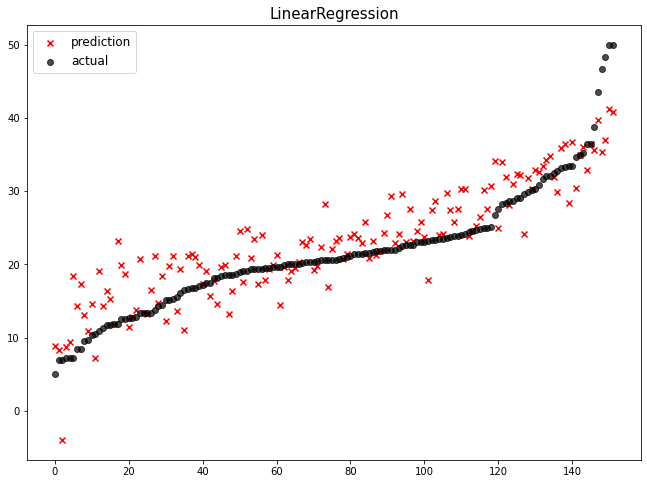

              model        mse
0  LinearRegression  17.296916


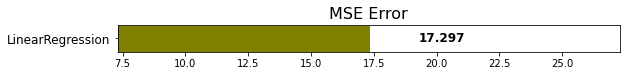

In [29]:
mse_eval('LinearRegression', lr_preds, y_test)

### Model : Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(x_train)

In [ ]:
poly_features

In [ ]:
poly_ftr_train = PolynomialFeatures(degree=2).fit_transform(x_train)

poly_lr = LinearRegression()
poly_lr.fit(poly_ftr_train, y_train)


poly_ftr_test = PolynomialFeatures(degree=2).fit_transform(x_test)
poly_lr_preds = poly_lr.predict(poly_ftr_test)

eval_models(y_test, poly_lr_preds)


In [ ]:
print(f'intercept : {poly_lr.intercept_}')
print(f'coefficients : {np.round(poly_lr.coef_,1)}')

# coeff = pd.Series(data=np.round(poly_lr.coef_,1), index=x_data.columns)
# coeff.sort_values(ascending=False)

### Model : Regularized Linear Regression (Ridge, Lasso, Elastic)

Ridge : L2 Regularization

In [30]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [31]:
ridge = Ridge(alpha=100)

cross_val_score_model(ridge, x_data, y_target)

Negative MSE scores : [-12.82 -27.28 -34.68 -52.69 -22.05]
RMSE scores : [3.58 5.22 5.89 7.26 4.7 ]
Avg RMSE : 5.330


In [32]:
def cross_val_score_reg_model(model, data, label, alphas, verbose=True):

    if verbose : print(f'##### {model} #####')

    for alpha in alphas:
        if model == 'Ridge': reg_model = Ridge(alpha=alpha)
        elif model == 'Lasso': reg_model = Lasso(alpha=alpha)
        elif model == 'ElasticNet': reg_model = ElasticNet(alpha=alpha, l1_ratio=0.5)

        neg_mse_scores = cross_val_score(reg_model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        print(f'alpha {alpha} 일 때 5 folds Average RMSE : {avg_rmse:1.3f}')


    fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
    coeff_df = pd.DataFrame()

    for pos, alpha in enumerate(alphas):
        if model == 'Ridge': reg_model = Ridge(alpha=alpha)
        elif model == 'Lasso': reg_model = Lasso(alpha=alpha)
        elif model == 'ElasticNet': reg_model = ElasticNet(alpha=alpha, l1_ratio=0.7)

        reg_model.fit(x_data, y_target)

        coeff = pd.Series(data=reg_model.coef_, index=x_data.columns)
        colname='alpha:'+str(alpha)
        coeff_df[colname] = coeff

        coeff = coeff.sort_values(ascending=False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3,6)
        sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

    plt.show()

    return coeff_df.sort_values(by=colname, ascending=False)


##### Ridge #####
alpha 10 일 때 5 folds Average RMSE : 5.518
alpha 100 일 때 5 folds Average RMSE : 5.330
alpha 150 일 때 5 folds Average RMSE : 5.328
alpha 200 일 때 5 folds Average RMSE : 5.341
alpha 500 일 때 5 folds Average RMSE : 5.450


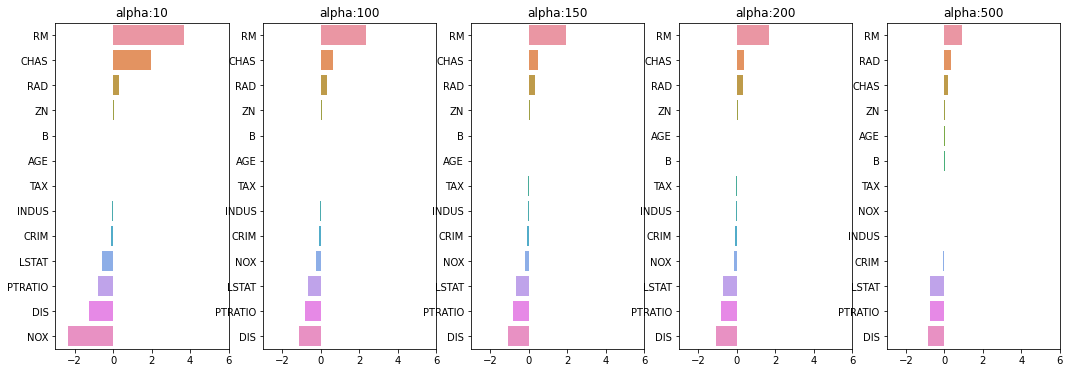

In [33]:
test_alphas = [10, 100, 150, 200, 500]


result_coeff = cross_val_score_reg_model('Ridge', x_data, y_target, test_alphas)

In [34]:
result_coeff

,alpha:10,alpha:100,alpha:150,alpha:200,alpha:500
RM,3.702272,2.334536,1.945427,1.672973,0.937658
RAD,0.279596,0.315358,0.323369,0.327895,0.329432
CHAS,1.952021,0.638335,0.472453,0.377547,0.179288
ZN,0.049579,0.054496,0.055245,0.055547,0.055153
AGE,-0.010707,0.001212,0.005691,0.009233,0.021679
B,0.010037,0.009393,0.009139,0.008949,0.008355
TAX,-0.013993,-0.015856,-0.016214,-0.016437,-0.016820
NOX,-2.371619,-0.262847,-0.171709,-0.125480,-0.042040
INDUS,-0.042962,-0.052826,-0.052757,-0.051809,-0.043565
CRIM,-0.101435,-0.102202,-0.101606,-0.100830,-0.096121


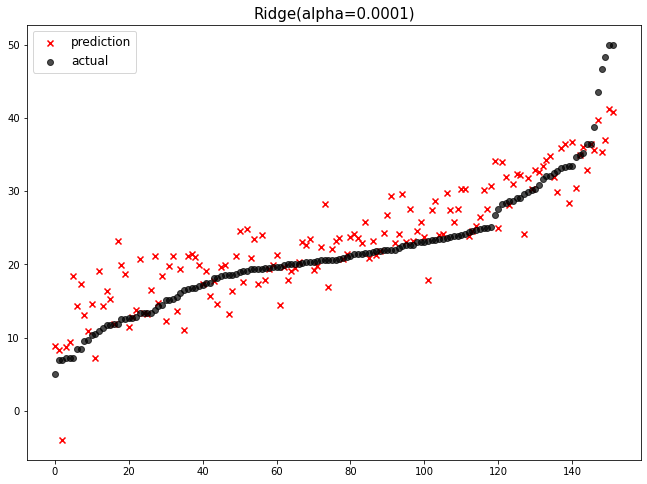

                 model        mse
0     Ridge(alpha=100)  19.361887
1      Ridge(alpha=10)  17.698680
2     LinearRegression  17.296916
3  Ridge(alpha=0.0001)  17.296850
4   Ridge(alpha=0.001)  17.296260
5    Ridge(alpha=0.01)  17.290491
6     Ridge(alpha=0.1)  17.244293
7       Ridge(alpha=1)  17.206833


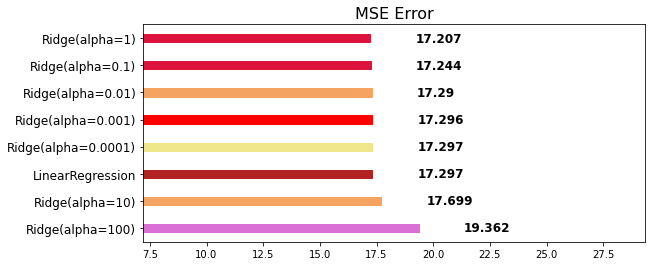

In [35]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=30)
    ridge.fit(x_train,y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)

plot_all()

Lasso : L1 Regularization

In [36]:
from sklearn.linear_model import Lasso

##### Lasso #####
alpha 0.03 일 때 5 folds Average RMSE : 5.644
alpha 0.07 일 때 5 folds Average RMSE : 5.612
alpha 0.1 일 때 5 folds Average RMSE : 5.615
alpha 0.2 일 때 5 folds Average RMSE : 5.622
alpha 0.5 일 때 5 folds Average RMSE : 5.669


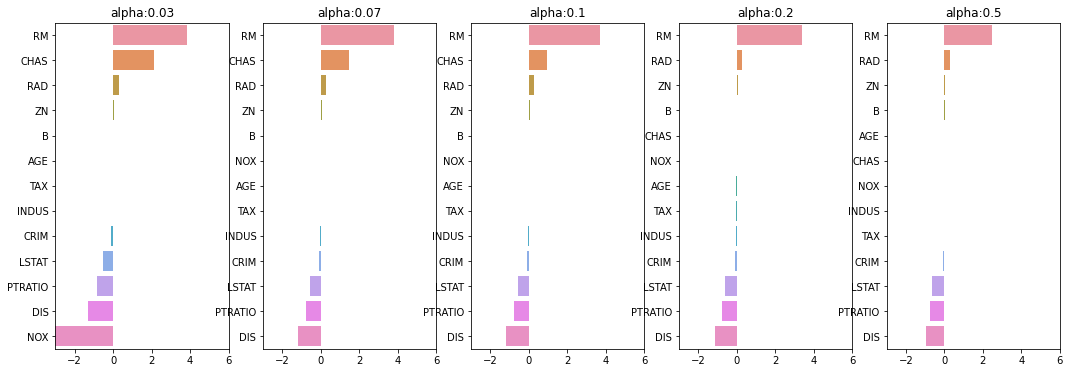

In [37]:
lasso_test_alphas = [0.03, 0.07, 0.1, 0.2, 0.5]

lasso_result_coeff = cross_val_score_reg_model('Lasso', x_data, y_target, lasso_test_alphas)

In [38]:
lasso_result_coeff

,alpha:0.03,alpha:0.07,alpha:0.1,alpha:0.2,alpha:0.5
RM,3.825939,3.789725,3.703202,3.406007,2.498212
RAD,0.285037,0.270936,0.274707,0.281748,0.277451
ZN,0.047863,0.049059,0.049211,0.049581,0.049544
B,0.009840,0.010248,0.010249,0.010154,0.009469
AGE,-0.006839,-0.011706,-0.010037,-0.005062,0.003604
CHAS,2.131692,1.434343,0.955190,0.000000,0.000000
NOX,-7.733933,-0.000000,-0.000000,-0.000000,-0.000000
INDUS,-0.016592,-0.042120,-0.036619,-0.023406,-0.005253
TAX,-0.013351,-0.014290,-0.014570,-0.015171,-0.015442
CRIM,-0.102566,-0.098193,-0.097894,-0.095627,-0.083289


=> alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜. (NOX, CHAS, INDUS, ...)

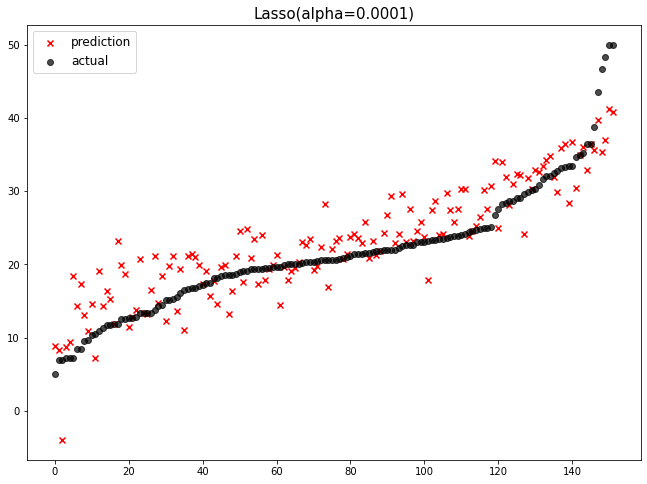

                  model        mse
0      Lasso(alpha=100)  49.380062
1       Lasso(alpha=10)  33.030215
2        Lasso(alpha=1)  22.137099
3      Ridge(alpha=100)  19.361887
4      Lasso(alpha=0.1)  17.828796
5       Ridge(alpha=10)  17.698680
6      LinearRegression  17.296916
7   Ridge(alpha=0.0001)  17.296850
8    Ridge(alpha=0.001)  17.296260
9   Lasso(alpha=0.0001)  17.295504
10    Ridge(alpha=0.01)  17.290491
11   Lasso(alpha=0.001)  17.283109
12     Ridge(alpha=0.1)  17.244293
13       Ridge(alpha=1)  17.206833
14    Lasso(alpha=0.01)  17.190093


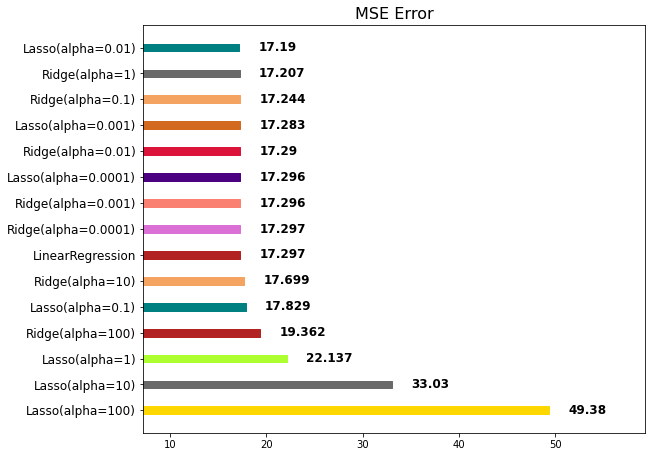

In [39]:
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

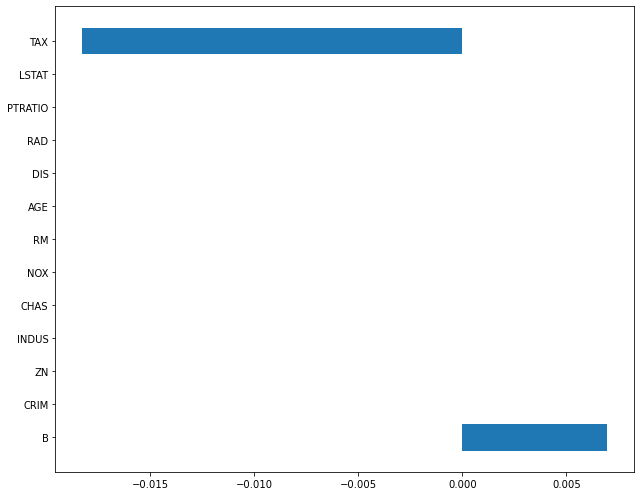

In [40]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

plot_coef(x_train.columns, lasso_100.coef_)

=> Lasso 모델에 너무 큰 alpha 계수를 적용하면 대부분의 feature들의 가중치가 0으로 수렴함.

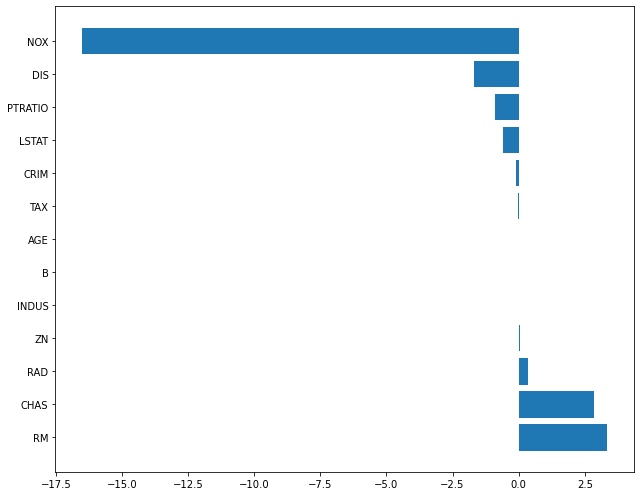

In [41]:
lasso_01 = Lasso(alpha=0.01)
lasso_01.fit(x_train, y_train)
lasso_pred_01 = lasso_01.predict(x_test)

plot_coef(x_train.columns, lasso_01.coef_)

Elastic : L1&L2 Regularization

##### ElasticNet #####
alpha 0.1 일 때 5 folds Average RMSE : 5.478
alpha 0.2 일 때 5 folds Average RMSE : 5.428
alpha 0.3 일 때 5 folds Average RMSE : 5.409
alpha 0.4 일 때 5 folds Average RMSE : 5.405
alpha 0.5 일 때 5 folds Average RMSE : 5.413


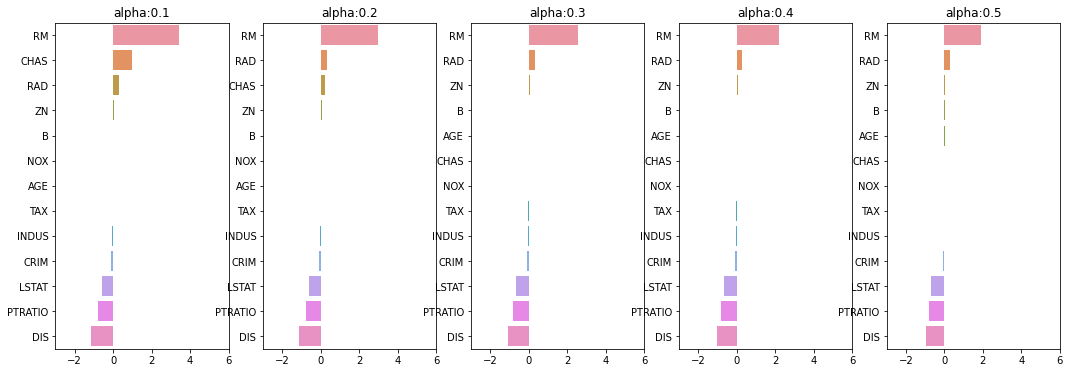

In [42]:
elastic_test_alphas = [0.1, 0.2, 0.3, 0.4, 0.5]

elastic_result_coeff = cross_val_score_reg_model('ElasticNet', x_data, y_target, elastic_test_alphas)

In [43]:
elastic_result_coeff

,alpha:0.1,alpha:0.2,alpha:0.3,alpha:0.4,alpha:0.5
RM,3.414154,2.937390,2.543862,2.206446,1.918419
RAD,0.283443,0.295189,0.299509,0.300750,0.300761
ZN,0.050617,0.051852,0.052363,0.052717,0.052878
B,0.010067,0.009837,0.009584,0.009333,0.009114
AGE,-0.008276,-0.002398,0.000862,0.004494,0.007760
CHAS,0.979706,0.190129,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TAX,-0.014814,-0.015495,-0.015783,-0.015934,-0.016046
INDUS,-0.042719,-0.035162,-0.030639,-0.027228,-0.023252
CRIM,-0.099213,-0.097836,-0.095239,-0.092171,-0.089070


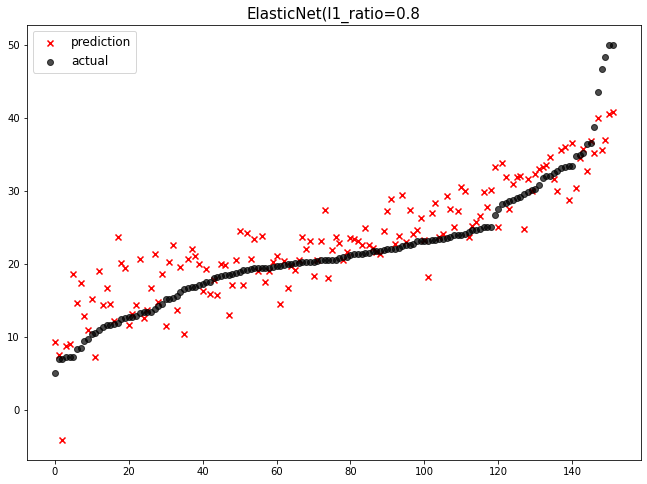

                      model        mse
0          Lasso(alpha=100)  49.380062
1           Lasso(alpha=10)  33.030215
2            Lasso(alpha=1)  22.137099
3          Ridge(alpha=100)  19.361887
4          Lasso(alpha=0.1)  17.828796
5           Ridge(alpha=10)  17.698680
6   ElasticNet(l1_ratio=0.2  17.382768
7   ElasticNet(l1_ratio=0.5  17.302575
8          LinearRegression  17.296916
9       Ridge(alpha=0.0001)  17.296850
10       Ridge(alpha=0.001)  17.296260
11      Lasso(alpha=0.0001)  17.295504
12        Ridge(alpha=0.01)  17.290491
13       Lasso(alpha=0.001)  17.283109
14         Ridge(alpha=0.1)  17.244293
15           Ridge(alpha=1)  17.206833
16  ElasticNet(l1_ratio=0.8  17.196351
17        Lasso(alpha=0.01)  17.190093


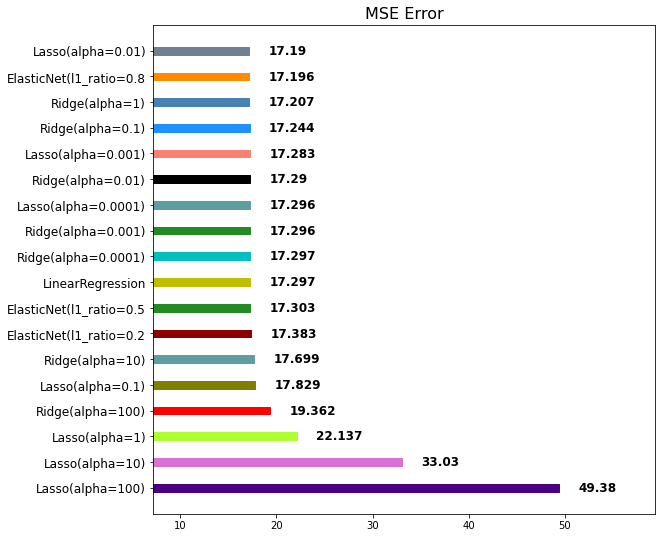

In [44]:
alpha = 0.01
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=30)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={}'.format(ratio), pred, y_test)
plot_all()


### Pipepline

파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됨.  
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
from sklearn.pipeline import make_pipeline

In [47]:
pipeline = make_pipeline(
    MinMaxScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [48]:
pipeline.fit(x_train,y_train)
pipeline_pred = pipeline.predict(x_test)

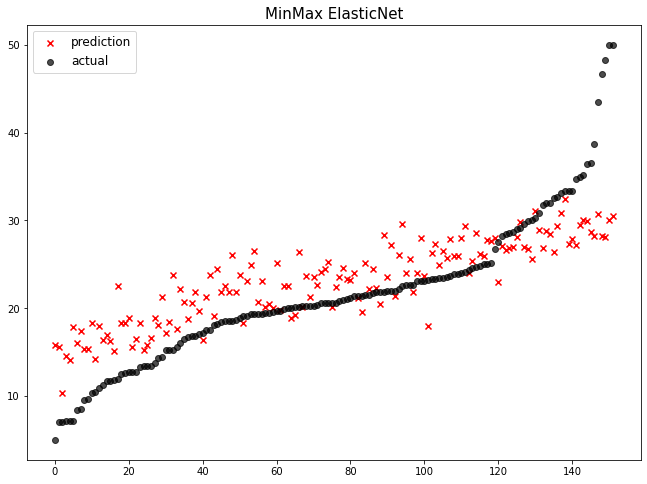

                      model        mse
0          Lasso(alpha=100)  49.380062
1           Lasso(alpha=10)  33.030215
2         MinMax ElasticNet  30.167176
3            Lasso(alpha=1)  22.137099
4          Ridge(alpha=100)  19.361887
5          Lasso(alpha=0.1)  17.828796
6           Ridge(alpha=10)  17.698680
7   ElasticNet(l1_ratio=0.2  17.382768
8   ElasticNet(l1_ratio=0.5  17.302575
9          LinearRegression  17.296916
10      Ridge(alpha=0.0001)  17.296850
11       Ridge(alpha=0.001)  17.296260
12      Lasso(alpha=0.0001)  17.295504
13        Ridge(alpha=0.01)  17.290491
14       Lasso(alpha=0.001)  17.283109
15         Ridge(alpha=0.1)  17.244293
16           Ridge(alpha=1)  17.206833
17  ElasticNet(l1_ratio=0.8  17.196351
18        Lasso(alpha=0.01)  17.190093


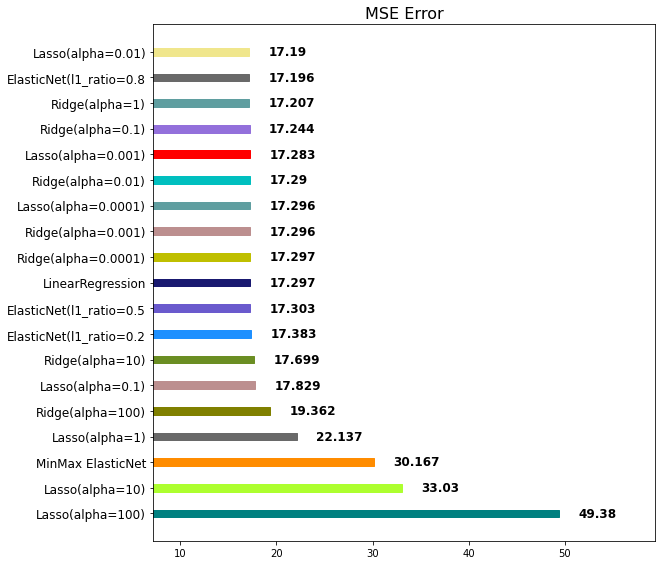

In [49]:
mse_eval('MinMax ElasticNet', pipeline_pred, y_test)

In [50]:
pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [51]:
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

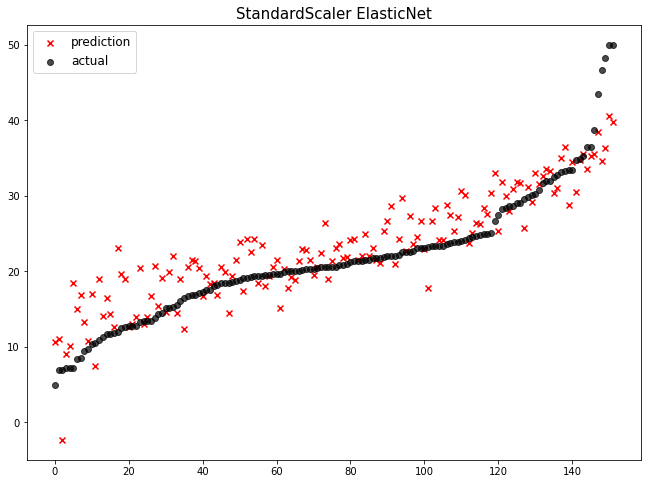

                        model        mse
0            Lasso(alpha=100)  49.380062
1             Lasso(alpha=10)  33.030215
2           MinMax ElasticNet  30.167176
3              Lasso(alpha=1)  22.137099
4            Ridge(alpha=100)  19.361887
5            Lasso(alpha=0.1)  17.828796
6             Ridge(alpha=10)  17.698680
7     ElasticNet(l1_ratio=0.2  17.382768
8     ElasticNet(l1_ratio=0.5  17.302575
9            LinearRegression  17.296916
10        Ridge(alpha=0.0001)  17.296850
11         Ridge(alpha=0.001)  17.296260
12        Lasso(alpha=0.0001)  17.295504
13          Ridge(alpha=0.01)  17.290491
14         Lasso(alpha=0.001)  17.283109
15           Ridge(alpha=0.1)  17.244293
16             Ridge(alpha=1)  17.206833
17    ElasticNet(l1_ratio=0.8  17.196351
18          Lasso(alpha=0.01)  17.190093
19  StandardScaler ElasticNet  16.309213


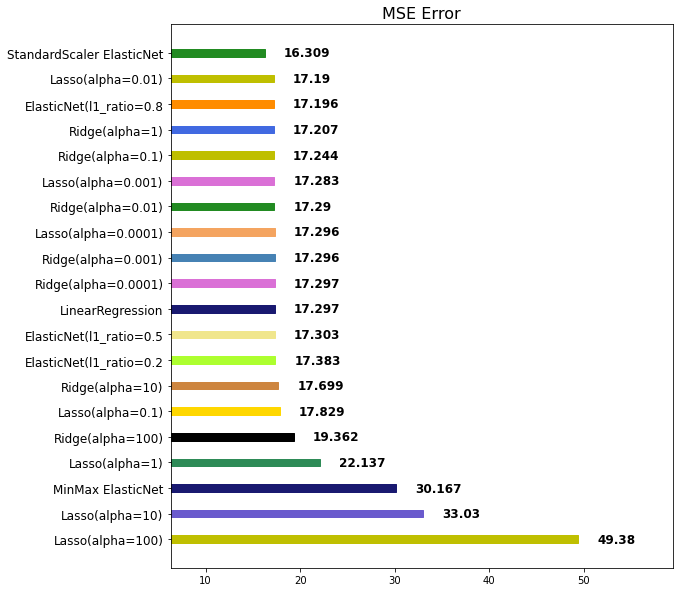

In [52]:
mse_eval('StandardScaler ElasticNet', pipeline_pred, y_test)

### Polynomial Features

다항식의 계수간 상호작용을 통해 새로운 feature를 생성함

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
x = np.arange(5).reshape(-1,1)
x

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [56]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [58]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [59]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train)[0]

In [60]:
poly_features

array([2.19770000e-01, 0.00000000e+00, 6.91000000e+00, 0.00000000e+00,
       4.48000000e-01, 5.60200000e+00, 6.20000000e+01, 6.08770000e+00,
       3.00000000e+00, 2.33000000e+02, 1.79000000e+01, 3.96900000e+02,
       1.62000000e+01, 4.82988529e-02, 0.00000000e+00, 1.51861070e+00,
       0.00000000e+00, 9.84569600e-02, 1.23115154e+00, 1.36257400e+01,
       1.33789383e+00, 6.59310000e-01, 5.12064100e+01, 3.93388300e+00,
       8.72267130e+01, 3.56027400e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.77481000e+01, 0.00000000e+00,
       3.09568000e+00, 3.87098200e+01, 4.28420000e+02, 4.20660070e+01,
       2.07300000e+01, 1.61003000e+03, 1.23689000e+02, 2.74257900e+03,
       1.11942000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [77]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [75]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

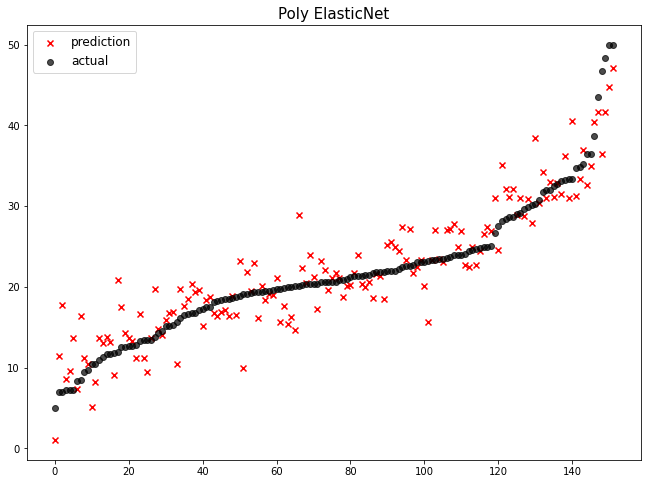

                        model        mse
0            Lasso(alpha=100)  49.380062
1             Lasso(alpha=10)  33.030215
2           MinMax ElasticNet  30.167176
3              Lasso(alpha=1)  22.137099
4            Ridge(alpha=100)  19.361887
5            Lasso(alpha=0.1)  17.828796
6             Ridge(alpha=10)  17.698680
7     ElasticNet(l1_ratio=0.2  17.382768
8     ElasticNet(l1_ratio=0.5  17.302575
9            LinearRegression  17.296916
10        Ridge(alpha=0.0001)  17.296850
11         Ridge(alpha=0.001)  17.296260
12        Lasso(alpha=0.0001)  17.295504
13          Ridge(alpha=0.01)  17.290491
14         Lasso(alpha=0.001)  17.283109
15           Ridge(alpha=0.1)  17.244293
16             Ridge(alpha=1)  17.206833
17    ElasticNet(l1_ratio=0.8  17.196351
18          Lasso(alpha=0.01)  17.190093
19  StandardScaler ElasticNet  16.309213
20            Poly ElasticNet  11.247087


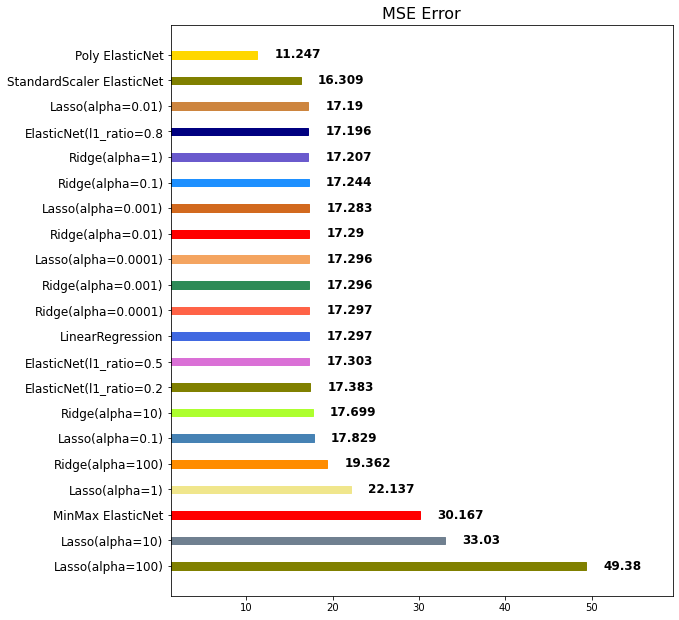

In [63]:
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [78]:
poly_pipeline.fit(x_train, y_train)
cross_val_score_model(poly_pipeline, x_data, y_target)

Negative MSE scores : [ -24.44  -78.14  -23.47  -59.99 -170.22]
RMSE scores : [ 4.94  8.84  4.84  7.75 13.05]
Avg RMSE : 7.884


In [66]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [67]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

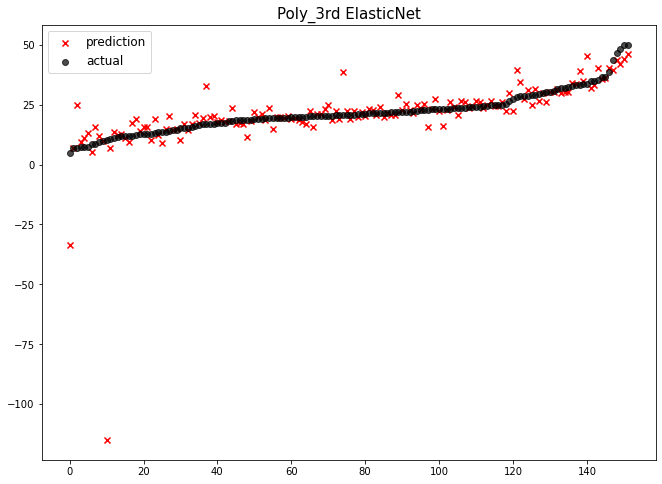

                        model         mse
0         Poly_3rd ElasticNet  129.180980
1            Lasso(alpha=100)   49.380062
2             Lasso(alpha=10)   33.030215
3           MinMax ElasticNet   30.167176
4              Lasso(alpha=1)   22.137099
5            Ridge(alpha=100)   19.361887
6            Lasso(alpha=0.1)   17.828796
7             Ridge(alpha=10)   17.698680
8     ElasticNet(l1_ratio=0.2   17.382768
9     ElasticNet(l1_ratio=0.5   17.302575
10           LinearRegression   17.296916
11        Ridge(alpha=0.0001)   17.296850
12         Ridge(alpha=0.001)   17.296260
13        Lasso(alpha=0.0001)   17.295504
14          Ridge(alpha=0.01)   17.290491
15         Lasso(alpha=0.001)   17.283109
16           Ridge(alpha=0.1)   17.244293
17             Ridge(alpha=1)   17.206833
18    ElasticNet(l1_ratio=0.8   17.196351
19          Lasso(alpha=0.01)   17.190093
20  StandardScaler ElasticNet   16.309213
21            Poly ElasticNet   11.247087


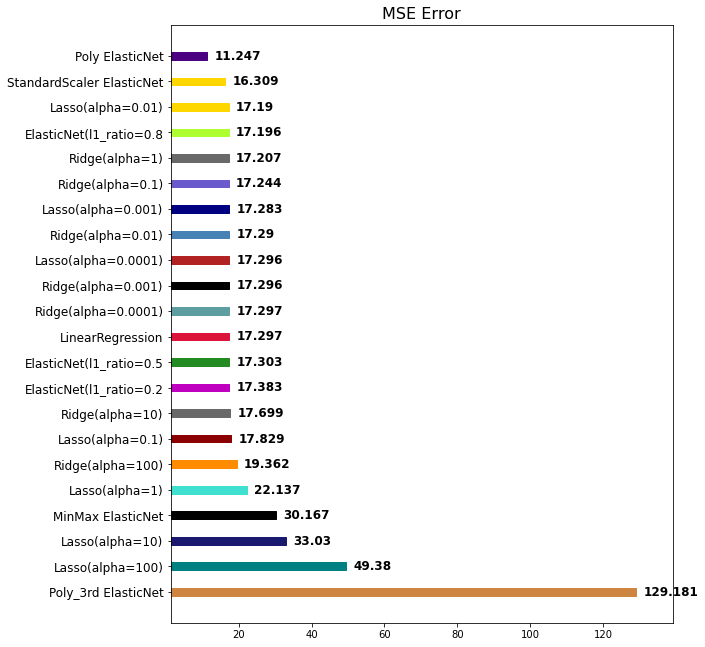

In [68]:
mse_eval('Poly_3rd ElasticNet', poly_pred, y_test)

In [69]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=1, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [70]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

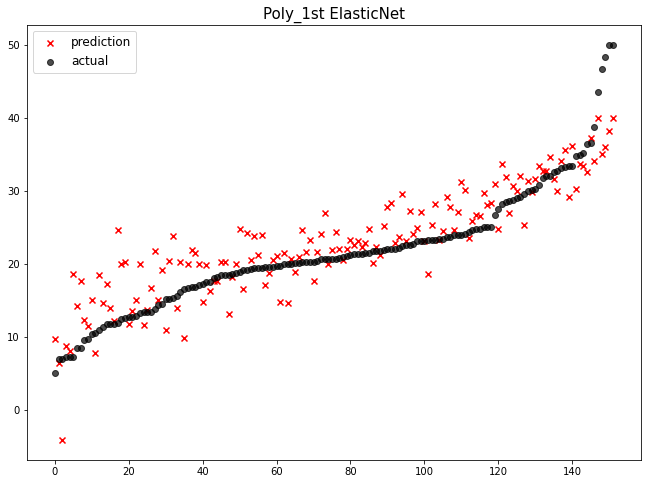

                        model         mse
0         Poly_3rd ElasticNet  129.180980
1            Lasso(alpha=100)   49.380062
2             Lasso(alpha=10)   33.030215
3           MinMax ElasticNet   30.167176
4              Lasso(alpha=1)   22.137099
5            Ridge(alpha=100)   19.361887
6         Poly_1st ElasticNet   18.247160
7            Lasso(alpha=0.1)   17.828796
8             Ridge(alpha=10)   17.698680
9     ElasticNet(l1_ratio=0.2   17.382768
10    ElasticNet(l1_ratio=0.5   17.302575
11           LinearRegression   17.296916
12        Ridge(alpha=0.0001)   17.296850
13         Ridge(alpha=0.001)   17.296260
14        Lasso(alpha=0.0001)   17.295504
15          Ridge(alpha=0.01)   17.290491
16         Lasso(alpha=0.001)   17.283109
17           Ridge(alpha=0.1)   17.244293
18             Ridge(alpha=1)   17.206833
19    ElasticNet(l1_ratio=0.8   17.196351
20          Lasso(alpha=0.01)   17.190093
21  StandardScaler ElasticNet   16.309213
22            Poly ElasticNet   11

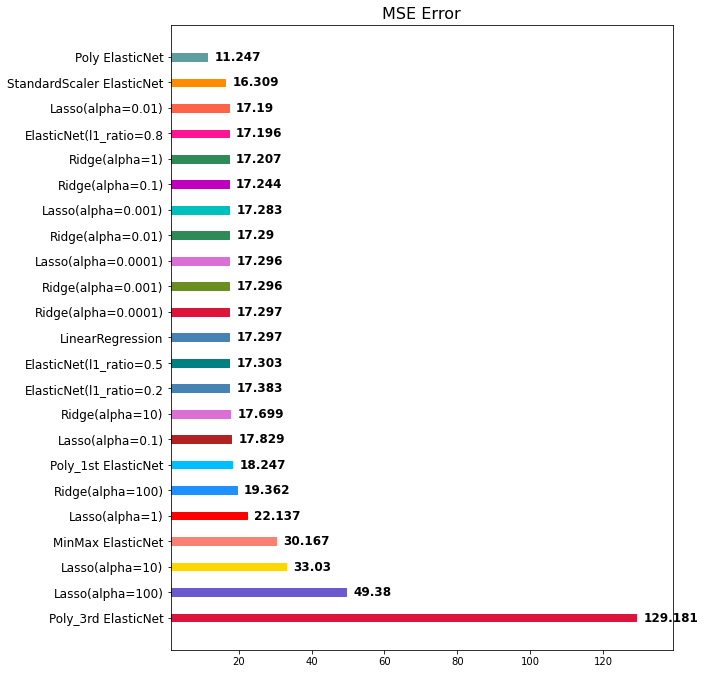

In [71]:
mse_eval('Poly_1st ElasticNet', poly_pred, y_test)

In [72]:
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

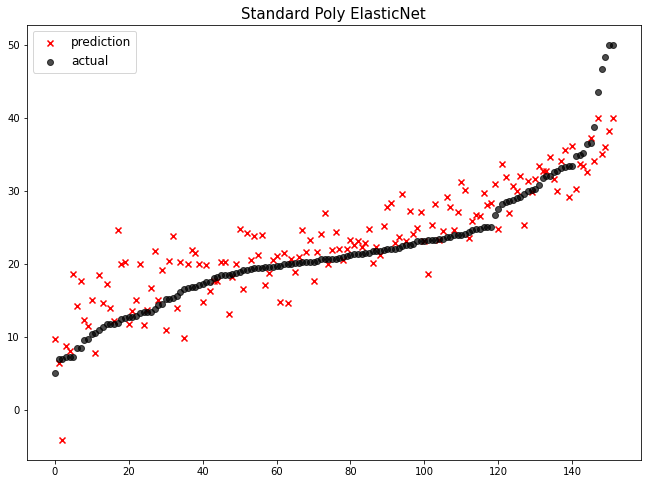

                        model         mse
0         Poly_3rd ElasticNet  129.180980
1            Lasso(alpha=100)   49.380062
2             Lasso(alpha=10)   33.030215
3           MinMax ElasticNet   30.167176
4              Lasso(alpha=1)   22.137099
5            Ridge(alpha=100)   19.361887
6         Poly_1st ElasticNet   18.247160
7    Standard Poly ElasticNet   18.247160
8            Lasso(alpha=0.1)   17.828796
9             Ridge(alpha=10)   17.698680
10    ElasticNet(l1_ratio=0.2   17.382768
11    ElasticNet(l1_ratio=0.5   17.302575
12           LinearRegression   17.296916
13        Ridge(alpha=0.0001)   17.296850
14         Ridge(alpha=0.001)   17.296260
15        Lasso(alpha=0.0001)   17.295504
16          Ridge(alpha=0.01)   17.290491
17         Lasso(alpha=0.001)   17.283109
18           Ridge(alpha=0.1)   17.244293
19             Ridge(alpha=1)   17.206833
20    ElasticNet(l1_ratio=0.8   17.196351
21          Lasso(alpha=0.01)   17.190093
22  StandardScaler ElasticNet   16

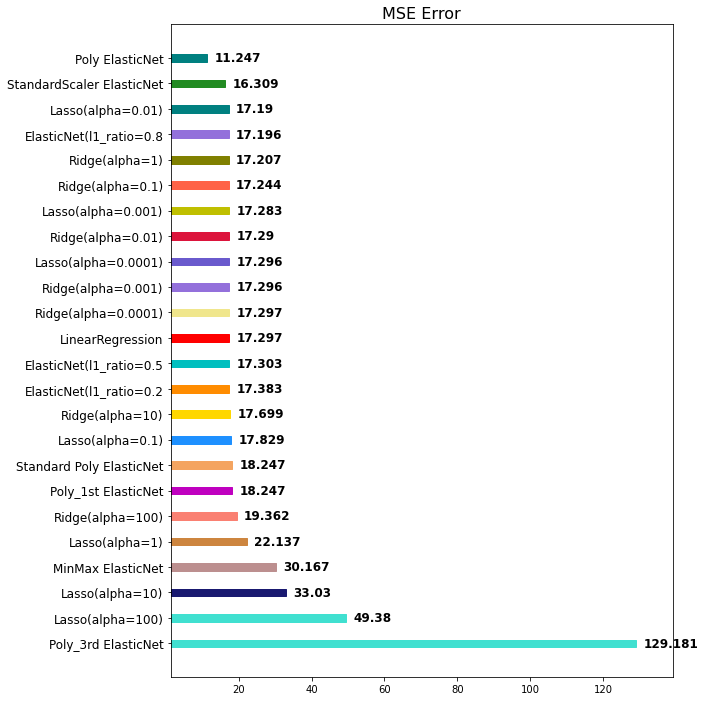

In [73]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

mse_eval('Standard Poly ElasticNet', poly_pred, y_test)

In [ ]:
cross_val_score_model(lr, x_data, y_target)